# Import:

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

In [64]:
csv_data = []
for i in os.listdir():
    if ".csv" in i:
        csv_data.append(i)

df = pd.read_csv(csv_data[0])

In [65]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Basic Analysis and Data Cleaning:

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


As we can see, there are some missing values. Let's deal with missing values first.

In [67]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
df.Gender.value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [69]:
df.Dependents.value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [70]:
df.Self_Employed.value_counts()

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [71]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [72]:
df.Credit_History.value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

we can replace the missing values in "Gender" column with "Male" and "Dependents" column with "0" considering the majority.
but we can't replace the values in "Self_Employed" and "Loan_Amount_Term" columns.

In [73]:
df = df.dropna(subset = ["Credit_History", "Self_Employed", "Loan_Amount_Term"])

In [74]:
df.isna().sum()

Loan_ID              0
Gender               5
Married              0
Dependents           7
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
df.Gender.replace(np.nan, df.Gender.value_counts().idxmax(), inplace = True)
df.Dependents.replace(np.nan, df.Dependents.value_counts().idxmax(), inplace = True)
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            320 non-null    object 
 1   Gender             320 non-null    object 
 2   Married            320 non-null    object 
 3   Dependents         320 non-null    object 
 4   Education          320 non-null    object 
 5   Self_Employed      320 non-null    object 
 6   ApplicantIncome    320 non-null    int64  
 7   CoapplicantIncome  320 non-null    float64
 8   LoanAmount         320 non-null    float64
 9   Loan_Amount_Term   320 non-null    float64
 10  Credit_History     320 non-null    float64
 11  Property_Area      320 non-null    object 
 12  Loan_Status        320 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 35.0+ KB


So, we now have a clean data to work with.

In [77]:
df["total_income"] = df.ApplicantIncome + df.CoapplicantIncome

In [78]:
status = {"Y": 1.0, "N": 0.0}
df.Loan_Status = df.Loan_Status.map(status)
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,3000.0


# Data Visualization

In [79]:
def bar_plot(col):
    sns.barplot(x = col, y = "Loan_Status", data = df)

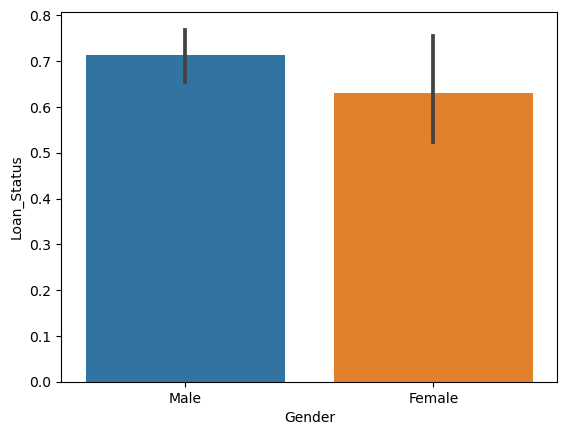

In [80]:
bar_plot("Gender")

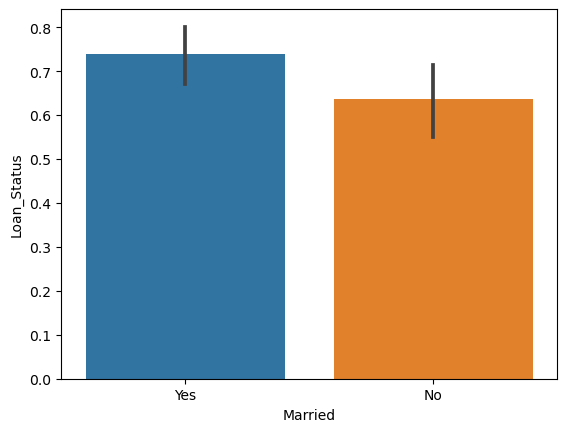

In [81]:
bar_plot("Married")

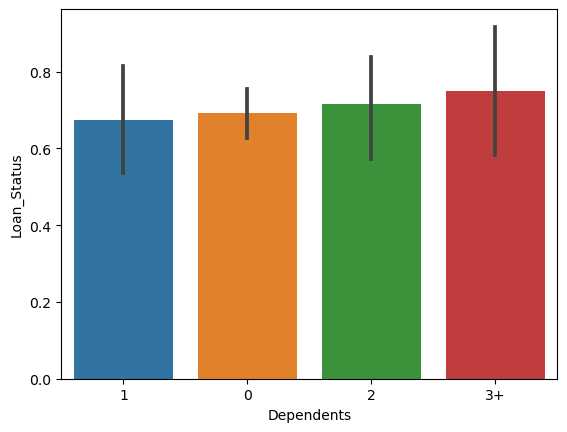

In [82]:
bar_plot("Dependents")

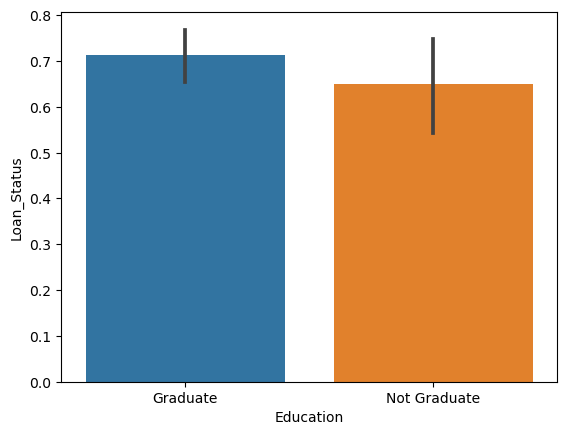

In [83]:
bar_plot("Education")

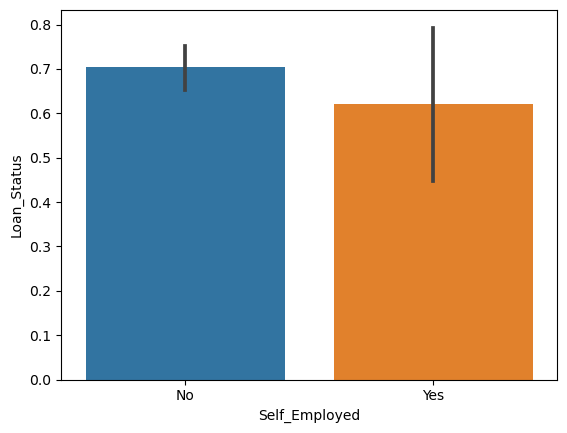

In [84]:
bar_plot("Self_Employed")

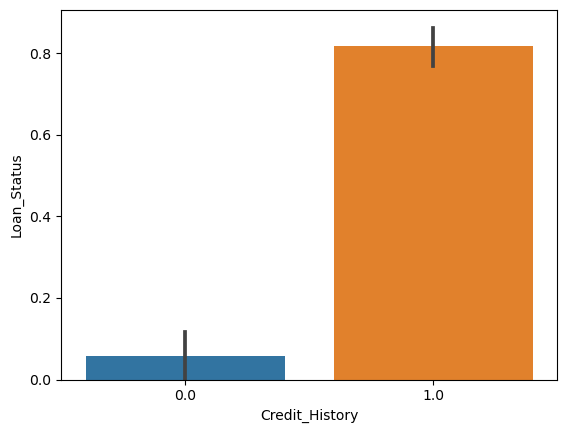

In [85]:
bar_plot("Credit_History")

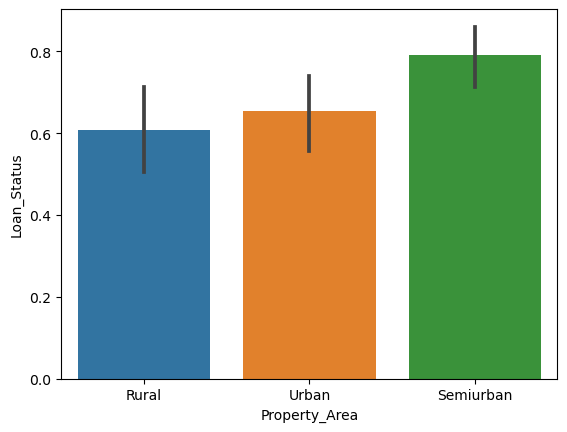

In [86]:
bar_plot("Property_Area")

According to the visualization, we can say that the relevent combinition for a loan to get accepted is a Male who is Married, Graduate, has credit history and isn't self employed.

# Preparing the data for machine learning:

In [87]:
indep = df[['Gender', 'Married', "Dependents", 'Education', 'Self_Employed', 'ApplicantIncome', 'Credit_History', 'Property_Area', 'total_income']]
dep = df.Loan_Status

In [88]:
from sklearn.preprocessing import LabelEncoder as LE

def tonum_(list_columns, dataset):
    
    for i in list_columns:
    
        encoder = LE()
        encoder.fit(dataset[i].unique().tolist())
        dataset[i] = encoder.transform(dataset[i].values)
        print("encoding completed for:", i)

In [89]:
tonum_(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"], indep)
indep.tail(2)

encoding completed for: Gender
encoding completed for: Married
encoding completed for: Dependents
encoding completed for: Education
encoding completed for: Self_Employed
encoding completed for: Property_Area


C:\Users\smitk\AppData\Local\Temp\ipykernel_17088\3002744602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = encoder.transform(dataset[i].values)
C:\Users\smitk\AppData\Local\Temp\ipykernel_17088\3002744602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = encoder.transform(dataset[i].values)
C:\Users\smitk\AppData\Local\Temp\ipykernel_17088\3002744602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Credit_History,Property_Area,total_income
379,1,1,3,0,0,4106,1.0,0,4106.0
380,0,0,0,0,1,4583,0.0,1,4583.0


In [90]:
indep = indep.values
dep = dep.values 

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.3, random_state = 3)

In [92]:
print("training set:", x_train.shape, y_train.shape)
print("testing set:", x_test.shape, y_test.shape)

training set: (224, 9) (224,)
testing set: (96, 9) (96,)


# Model Training:

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
loantree = DecisionTreeClassifier(max_depth=4)

In [95]:
loantree.fit(x_train,y_train)
pred = loantree.predict(x_test)

In [96]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.7604166666666666